In [1]:
# A module for handling data
import pandas as pd
# A module that helps finding all pathnames that match a certain pattern
import glob
# A class that will be used to count the number of times a word has occurred in a text
from sklearn.feature_extraction.text import CountVectorizer
# A method used to split the dataset into training and testing
from sklearn.model_selection import train_test_split
# The multinomial type of the Naive Bayes classfier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
# Importing different metrics that would allow us to evaluate our model
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('ggplot')

import numpy as np

In [2]:
files = glob.glob(r"C:\Users\Oluwasegun\Downloads\Notebooks_and_Dataset\youtube-dataset\\*csv")
files

['C:\\Users\\Oluwasegun\\Downloads\\Notebooks_and_Dataset\\youtube-dataset\\Youtube01.csv',
 'C:\\Users\\Oluwasegun\\Downloads\\Notebooks_and_Dataset\\youtube-dataset\\Youtube02.csv',
 'C:\\Users\\Oluwasegun\\Downloads\\Notebooks_and_Dataset\\youtube-dataset\\Youtube03.csv',
 'C:\\Users\\Oluwasegun\\Downloads\\Notebooks_and_Dataset\\youtube-dataset\\Youtube04.csv',
 'C:\\Users\\Oluwasegun\\Downloads\\Notebooks_and_Dataset\\youtube-dataset\\Youtube05.csv']

In [3]:
all_df = []

for i in files:
    all_df.append(pd.read_csv(i).drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis = 1))

In [4]:
all_df[0]

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
344,How can this have 2 billion views when there's...,0
345,I don't now why I'm watching this in 2014﻿,0
346,subscribe to me for call of duty vids and give...,1
347,hi guys please my android photo editor downloa...,1


In [5]:
len(all_df)

5

In [6]:
# Create a dataframe that combines all pandas dataframes from the 'all_df' list
data = pd.concat(all_df,axis=0, ignore_index=True)
data

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,watch?v=vtaRGgvGtWQ Check this out .﻿,1
4,"Hey, check out my new website!! This site is a...",1
...,...,...
1950,I love this song because we sing it at Camp al...,0
1951,I love this song for two reasons: 1.it is abou...,0
1952,wow,0
1953,Shakira u are so wiredo,0


In [7]:
# Check for null values. In this case, there aren't any.
data.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [8]:
# Check the number of representatives from each class. 
# In this case, the data is reasonably balanced.
data['CLASS'].value_counts()

1    1004
0     951
Name: CLASS, dtype: int64

C:\Users\Oluwasegun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CLASS', ylabel='count'>

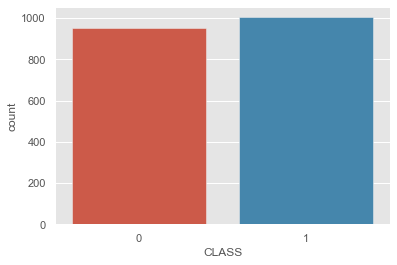

In [9]:
#Visualize the distribution
sns.countplot(data['CLASS'],label='CLASS DISTRIBUTION')

### Defining the inputs and the target. Creating the train-test split.

In [10]:
# Define the inputs and the target
inputs = data['CONTENT']
target = data['CLASS']

In [11]:
inputs.shape

(1955,)

In [12]:
target.shape

(1955,)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target,
                                                    test_size=0.2,
                                                    random_state=365,
                                                    stratify= target)

In [14]:
y_train.value_counts()

1    803
0    761
Name: CLASS, dtype: int64

In [15]:
y_test.value_counts()

1    201
0    190
Name: CLASS, dtype: int64

### Tokenizing the YouTube comments

In [16]:
vectorizer = CountVectorizer()

In [17]:
x_train_transf = vectorizer.fit_transform(x_train)
x_test_transf = vectorizer.transform(x_test)

In [18]:
x_train_transf.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
x_train_transf.shape

(1564, 3925)

In [20]:
x_test_transf.shape

(391, 3925)

### Performing the classification

In [21]:
clf = MultinomialNB()

clf.fit(x_train_transf,y_train)

MultinomialNB()

In [22]:
# Print the class priors.
np.exp(clf.class_log_prior_)

array([0.48657289, 0.51342711])

In [23]:
# Return the parameters of the classifier
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True}

### Performing the evaluation on the test dataset

In [24]:
# Predict the target of the observations in the test set
y_test_pred = clf.predict(x_test_transf)

<AxesSubplot:>

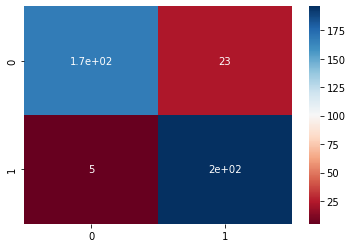

In [25]:
# Drop the seaborn style, so that we remove the white lines passing throguh the numbers 
sns.reset_orig()

# Create the confusion matrix by providing the true and the predicted values as arguments.
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, cmap='RdBu')

In [26]:
# The classification report consists of the precision, recall and f1-score of each class as well as
# the overall accuracy of the model.
print(classification_report(y_test,y_test_pred,target_names=['Ham','Spam']))

              precision    recall  f1-score   support

         Ham       0.97      0.88      0.92       190
        Spam       0.89      0.98      0.93       201

    accuracy                           0.93       391
   macro avg       0.93      0.93      0.93       391
weighted avg       0.93      0.93      0.93       391



### Creating probability-distribution figures

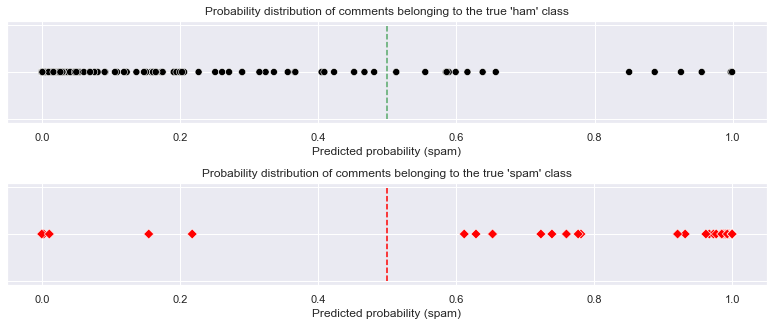

In [27]:
# For each ovservation, store its probability of being a spam. Round it to 3 digits after the decimal points.
# These probabilities will later serve as the x-coordinates of a scatter plot
spam_proba = clf.predict_proba(x_test_transf).round(3)[:,1];

# Create a new data frame which will store the true classes, the predicted classes and the predicted probability
# for an observation to belong to the spam class
df_scatter = pd.DataFrame()

# Create the columns of the data frame
df_scatter['True class'] = y_test
df_scatter['Predicted class'] = y_test_pred
df_scatter['Predicted probability (spam)'] = spam_proba

# Reset the index of the data frame, so that the indexing is sequential
df_scatter = df_scatter.reset_index(drop=True)

# Define two palettes for the different plots
palette_0 = sns.color_palette(['#000000'])
palette_1 = sns.color_palette(['#FF0000'])

# Create two new data frames. The first one stores the samples whose true class is 0.
# The second one stores the samples whose true class is 1.
df_scatter_0 = df_scatter[df_scatter['True class']==0].reset_index(drop = True)
df_scatter_1 = df_scatter[df_scatter['True class']==1].reset_index(drop = True)

# Set the seaborn style
sns.set()

# Create two subfigures, so that they are arranged in 2 rows and 1 column.
# Set the size of the figures
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,5))
fig.tight_layout(pad = 3)

# Create a scatter plot.
# On the x-axis, we have the predicted probability of a comment being a spam.
# The y-axis takes only one value - zero. We create an array full of zeros having a length equal to 
# the number of samples whose true class is 0.
# The 'data' parameter specifies the dataset we are drawing the columns from.
# The 'hue' parameter specifies the feature based on which the points are going to be colored. In this case,
# this feature has only a single class - the 0 class.
# The 's' parameter specifies the size of the points.
# The 'markers' parameter determines the shape of the points.
# The 'palette' parameter specifies the colors to be used in the plot.
# The 'style' parameter connects markers to classes.
# We have decided to set the 'legend' parameter equal to False as we have only one class in the plot. 
# We decide to remove the ticks from the y-axis as they can be chosen arbitrarily.

sns.scatterplot(x = 'Predicted probability (spam)',
                y = np.zeros(df_scatter_0.shape[0]),
                data = df_scatter_0,
                hue = 'True class',
                s = 50,
                markers= ['o'],
                palette= palette_0,
                style= 'True class',
                legend= False,
                ax = ax1).set(yticklabels=[])

# Set a title above the first plot.
ax1.set_title('Probability distribution of comments belonging to the true \'ham\' class')

# Create a red vertical dashed line passing through the point x = 0.5
# The first parameter specifies the x-coordinate.
# The second and third parameters specify the min and the max y-coordinates.
# We choose a dashed linestyle.
# We color the line in red.
ax1.vlines(0.5,-1,1, linestyles = 'dashed', colors = 'g')

# The comments above apply to this plot. The code is adapted to the spam class
sns.scatterplot(x = 'Predicted probability (spam)', 
                y = np.zeros(df_scatter_1.shape[0]), 
                hue = 'True class', 
                data = df_scatter_1,
                s = 50,
                palette = palette_1,
                markers = ['D'],
                style = 'True class',
                legend = False, 
                ax = ax2).set(yticklabels=[])

# Set a title above the second plot.
ax2.set_title('Probability distribution of comments belonging to the true \'spam\' class')

# Create a red vertical dahsed line for the second plot
ax2.vlines(0.5, -1, 1, linestyles = 'dashed', colors = 'red');